In [75]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [76]:
def load_and_convert_image(image_file):
    img = Image.open(image_file).convert("L")  # Load image and convert to grayscale
    img_array = np.array(img, dtype=float) / 255.0  # normalize

    return img_array

In [77]:

def find_closest_palette_color(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [78]:
def error_diffusion(image_file, level):
    """
    Apply error diffusion on the image using given quantization levels.
    """
    # Load and convert the image
    img_array = load_and_convert_image(image_file)
    possible_values = np.linspace(0, 1, level)
    # prepare output
    output = np.zeros_like(img_array)

    # Apply error diffusion
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            original = img_array[i, j]
            closest_value = find_closest_palette_color(possible_values, original)
            output[i, j] = closest_value
            error = original - closest_value

            # Propagate the error to adjacent pixels
            if j + 1 < img_array.shape[1]:
                img_array[i, j + 1] += error * 7 / 16
            if i + 1 < img_array.shape[0]:
                img_array[i + 1, j - 1 if j > 0 else j] += error * 3 / 16
                img_array[i + 1, j] += error * 5 / 16
                if j + 1 < img_array.shape[1]:
                    img_array[i + 1, j + 1] += error * 1 / 16
    return (output * 255).astype(np.uint8)


In [91]:
def generate_and_show_images(image_file, levels):
    fig, axs = plt.subplots(3, 2, figsize=(20, 20))

    # Load and display the original image
    img = Image.open(image_file).convert("L")
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].set_title('Original')
    axs[0, 0].axis('off')
    k = 0
    # Create and display the diffused images
    for i in range(1, levels + 1):
        output_image = error_diffusion(image_file, i)
        ax = axs[i // 2, i % 2]
        ax.imshow(output_image, cmap='gray')
        ax.axis('off')
        ax.set_title(f'{k/100}')
        k += 25

    plt.subplots_adjust(wspace=0.01, hspace=0.1)
    plt.savefig("output.png")
    plt.show()

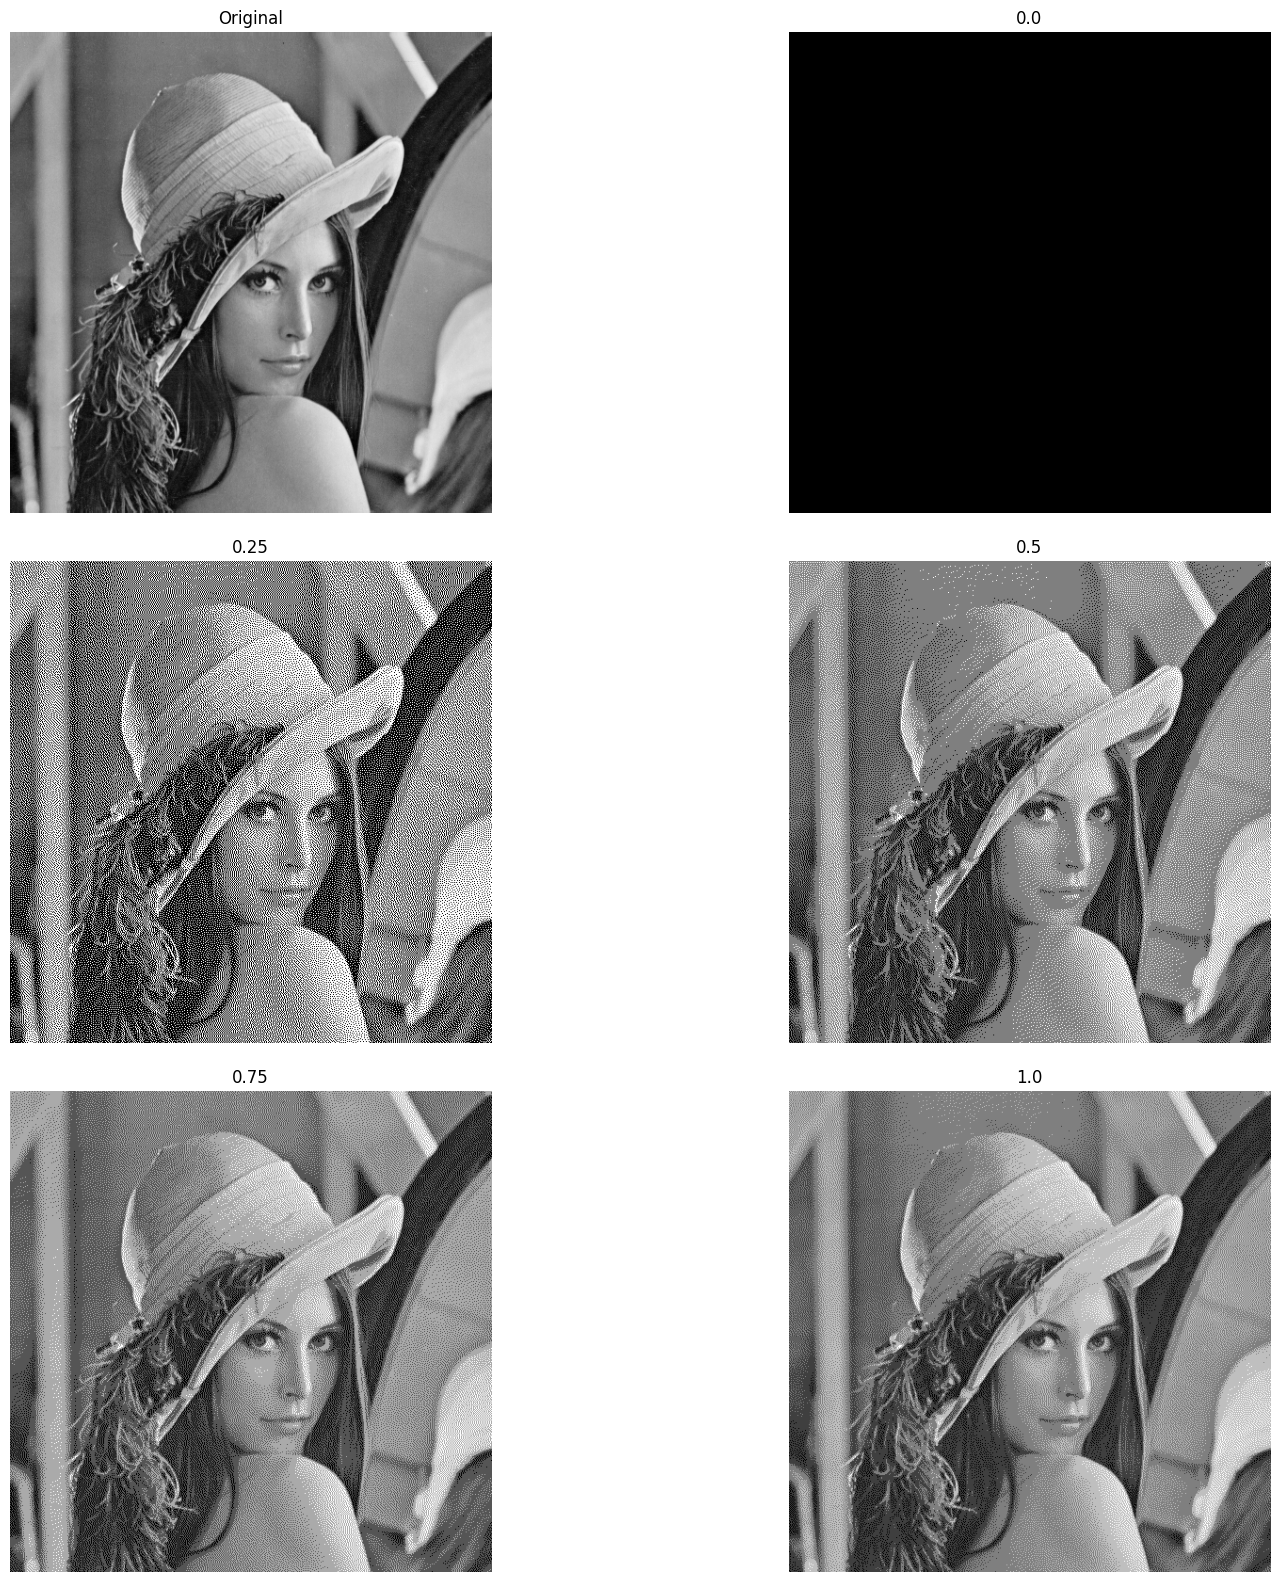

In [93]:
# Generate the images with 5 levels
generate_and_show_images("lena_gray.png", 5)